In [5]:
%load_ext autoreload
%autoreload 2

    
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from TraceGenerator import TraceDataGeneration, AutoGenerator
#from TraceDataGeneration_single_trace import TraceDataGeneration

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
function_list = ['constant',
                 'impulse_like',
                 'linear_transition',
                 'rectangular_pulse',
                 'step_like',
                 'trapezoidal',
                 'triangular']

In [7]:
import random
function = []
for i in range(3):
    function.append(random.choice(function_list))

In [54]:
gen = AutoGenerator(n=3, max_value=100, min_value=0, function=function)

In [81]:
gen.test_generate()

[{'start_value': 1.0,
  'high_value': 1.0,
  'end_value': 1.0,
  'time1': 1.0,
  'time2': 1.0,
  'time3': 1.0,
  'time4': 1.0,
  'length': 1.0},
 {'start_value': 1.0,
  'high_value': 1.0,
  'end_value': 1.0,
  'time1': 1.0,
  'time2': 1.0,
  'length': 1.0},
 {'start_value': 1.0,
  'end_value': 1.0,
  'time1': 1.0,
  'time2': 1.0,
  'length': 1.0}]

In [76]:
a = gen.random_parameter_generation()

In [80]:
a

3

In [186]:
def generate_numbers(num_function):
    target_recipe_step = random.randint(1, num_function)
    print(target_recipe_step)
    if target_recipe_step == num_function:
        return 1
    result = [0] 
    # 리스트의 길이가 1 이상이고, 원하는 합계가 양수인 경우에만 작동
    if target_recipe_step <= 0 or num_function <= 0:
        return result
    
    for _ in range(target_recipe_step - 1):
        # 남은 합계 중에서 랜덤한 숫자를 생성
        num = random.randint(1, num_function - (target_recipe_step - len(result)))
        # 리스트에 추가
        result.append(num)
        # 합계 업데이트
        num_function -= num
    
    # 마지막 숫자는 남은 합계
    result.append(num_function)
    
    return result

# 테스트
num_function = 6
result = generate_numbers(num_function)
print(result)  # 예: [2, 3, 1]

4
[0, 3, 1, 1, 1]


In [ ]:
def generate_numbers(num_function):
    target_recipe_step = random.randint(1, num_function)
    print(target_recipe_step)
    if target_recipe_step == num_function:
        return 1
    result = [0] 
    # 리스트의 길이가 1 이상이고, 원하는 합계가 양수인 경우에만 작동
    if target_recipe_step <= 0 or num_function <= 0:
        return result
    
    for _ in range(target_recipe_step - 1):
        # 남은 합계 중에서 랜덤한 숫자를 생성
        num = random.randint(1, num_function - (target_recipe_step - len(result)))
        # 리스트에 추가
        result.append(num)
        # 합계 업데이트
        num_function -= num
    
    # 마지막 숫자는 남은 합계
    result.append(num_function)
    
    return result

# 테스트
num_function = 6
result = generate_numbers(num_function)
print(result)  # 예: [2, 3, 1]

a = []
for i, j in zip(result[0:-1], result[1:]):
    a.append(function[i:j])

In [91]:
gen = AutoGenerator(n=3, max_value=100, min_value=0, function=function)

In [92]:
param = gen.random_parameter_generation()

In [9]:
import numpy as np

def get_lengths(arr):
    return np.array([len(item) for item in arr])

# 예제 리스트
example_list = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]

# 함수 호출
result = get_lengths(example_list)
print(result)  # 출력: [3 2 4]

[3 2 4]


In [95]:
trace = gen.generate_trace()

In [96]:
trace

,LOT_ID,WAFER_ID,PROCESS,PROCESS_STEP,RECIPE,RECIPE_STEP,PARAMETER_NAME,PARAMETER_VALUE,TIME
0,lot,wafer1,process,process_step,recipe,1,parameter_name,107.850001,2024-01-01 00:00:00
1,lot,wafer1,process,process_step,recipe,1,parameter_name,103.966751,2024-01-01 00:00:01
2,lot,wafer1,process,process_step,recipe,1,parameter_name,107.274332,2024-01-01 00:00:02
3,lot,wafer1,process,process_step,recipe,1,parameter_name,103.835427,2024-01-01 00:00:03
4,lot,wafer1,process,process_step,recipe,1,parameter_name,109.072859,2024-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...
53,lot,wafer3,process,process_step,recipe,2,parameter_name,96.409451,2024-01-01 00:02:49
54,lot,wafer3,process,process_step,recipe,3,parameter_name,-13.652353,2024-01-01 00:02:50
55,lot,wafer3,process,process_step,recipe,3,parameter_name,0.392853,2024-01-01 00:02:51
56,lot,wafer3,process,process_step,recipe,3,parameter_name,-0.663884,2024-01-01 00:02:52


[26 54 57]


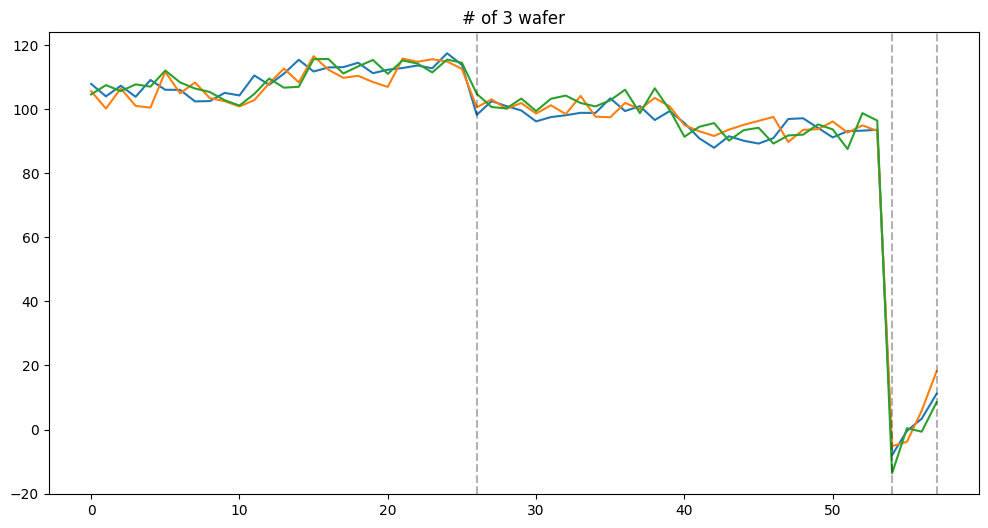

In [97]:
gen.trace_checker(trace)

In [14]:
def get_lengths(arr):
    return np.array([len(item) for item in arr])
length = get_lengths(trace[0])#length_function)

In [15]:
length

array([ 1,  9, 17])

In [23]:
len(np.concatenate(trace[0]))

27

In [25]:
np.cumsum(single_trace_step_lenght)

array([ 1, 10, 27])

In [26]:
col = ['LOT_ID', 'WAFER_ID', 'PROCESS', 'PROCESS_STEP', 'RECIPE', 'RECIPE_STEP', 'PARAMETER_NAME',
       'PARAMETER_VALUE', 'TIME']

In [51]:
data = []
for num, single in enumerate(trace):
    df = pd.DataFrame([], columns=col)
    df.PARAMETER_VALUE = np.concatenate(single)
    df['LOT_ID'] = 'lot'
    df['WAFER_ID'] = f'wafer{num+1}'
    df['PROCESS'] = 'process'
    df['PROCESS_STEP'] = 'process_step'
    df['RECIPE'] = 'recipe'
    df['PARAMETER_NAME'] = 'parameter_name'
    step_list = []
    # for step_num, step in enumerate(single):
    #     recipe_step = [str(step_num+1)] * len(step)
    #     step_list.extend(recipe_step)
    df['RECIPE_STEP'] = [str(step_num+1) for step_num, step in enumerate(single) for _ in step]
    data.append(df)
data = pd.concat(data)
data['TIME'] = pd.date_range("2024-01-01", periods=data.shape[0], freq="S")

In [50]:
[str(step_num+1) for step_num, step in enumerate(single) for _ in step]

['1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3']

In [49]:
data = []
date_range = pd.date_range("2024-01-01", periods=sum(len(single) for single in trace), freq="S")

for num, single in enumerate(trace):
    df = pd.DataFrame({'PARAMETER_VALUE': np.concatenate(single),
                       'LOT_ID': ['lot'] * len(single),
                       'WAFER_ID': [f'wafer{num+1}'] * len(single),
                       'PROCESS': ['process'] * len(single),
                       'PROCESS_STEP': ['process_step'] * len(single),
                       'RECIPE': ['recipe'] * len(single),
                       'PARAMETER_NAME': ['parameter_name'] * len(single),
                       'RECIPE_STEP': [str(step_num+1) for step_num, step in enumerate(single) for _ in step]})
    data.append(df)

data = pd.concat(data)
data['TIME'] = date_range

ValueError: All arrays must be of the same length

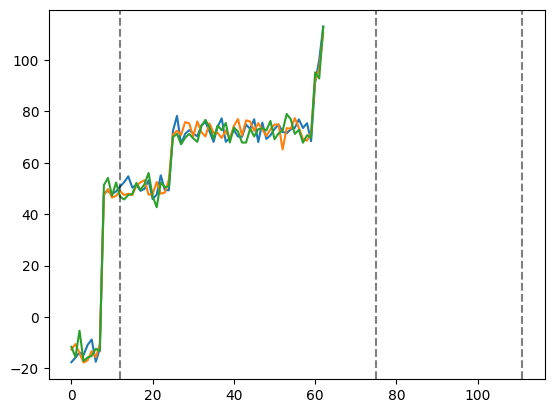

In [23]:
for t in trace:
    tt = np.concatenate(t)
    plt.plot(tt)
for v in [12, 12+63, 36+12+63]:
    plt.axvline(v, linestyle='--', alpha=0.5, color='black')
plt.show()